# Random Walk e PSO na minimização de função
Por: Ábner Pereira

# Índice
- [Primeiro caso de teste](#Primeiro-caso-de-teste)
   - [Função objetivo](#Função-objetivo)
   - [Equação](#Equação)
   - [Faixas](#Faixas)
   - [Funções](#Funções)
   - [Execução](#Execução)
   - [Visualização](#Visualização)
- [PSO](#PSO)

# Primeiro caso de teste

Nesta atividade será desenvolvido um Random Walk para achar o mínimo da [função objetivo](#Função-objetivo) abaixo . Usando uma distribuição uniforme para gerar uma população de sequências (x1, x2, e x3) de números reais variando de 0 a 1, convertidos respectivamente segundo as [faixas](#Faixas) de x1, x2 e x3, sob a [Equação](#Equação) abaixo.

### Função objetivo

In [1004]:
from IPython.display import display, Math, Latex
display(Math(r'Fun = 10 \times (x_1 - 1)^{2} + 20 \times (x_2 - 2)^{2} + 30 \times (x_3 - 3)^{2}'))

<IPython.core.display.Math object>

### Equação

In [1005]:
display(Math(r"x_i'= LB_{x_i} + (UB{x_i} - LB{x_i}) \times valor_i"))

<IPython.core.display.Math object>

### Faixas

In [1006]:
display(Math(r'LB_{x_1} = -3, UB_{x_1} = 3'))
display(Math(r'LB_{x_2} = -2, UB_{x_2} = 4'))
display(Math(r'LB_{x_3} = 0, UB_{x_3} = 6'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1007]:
#Entrada
x_inf = 0
x_sup = 1
qtd_seqs = 100
qtd_valores = 3
qtd_geracoes = 1000
qtd_execucoes = 20
lb = [-3,-2, 0]  
ub = [3, 4, 6]

### Funções

In [1008]:
def populacao_a(x_inf, x_sup, qtd_seqs, qtd_valores):
  #valores a aleatórios
  populacao = [[]]
  populacao = np.random.uniform(x_inf,x_sup,(qtd_seqs,qtd_valores))
  return populacao

In [1009]:
def populacao_n(lb, ub, qtd_seqs, qtd_valores, populacao):
  #conversão nas faixas
  i = 0
  for i in range(qtd_seqs):
    j = 0
    for j in range(qtd_valores):
      # equação 1 em cada valor
      populacao[i][j] = lb[j] + (ub[j] - lb[j]) * populacao[i][j]
      j += 1
    i += 1
  return populacao

In [1010]:
def funcao_obj(x1, x2, x3):
  y = 0
  y = 10 * (x1 - 1)**2 + 20 * (x2 - 2)**2 + 30 * (x3 - 3)**2
  return y

In [1011]:
def resultado(qtd_seqs, qtd_valores, populacao):
  i = 0
  x = [0,0,0]
  y = []
  for i in range(qtd_seqs):
    j = 0
    for j in range(qtd_valores):
      x[j] = populacao[i][j]
      j += 1
    y.append(funcao_obj(x[0], x[1], x[2]))
    i += 1
  return y

### Execução

In [1012]:
import numpy as np
import pandas as pd

In [1013]:
df_populacao = pd.DataFrame(None, columns=["x1", "x2", "x3", "y"]) #melhores indivíduos por geração
df_fitness =  pd.DataFrame(None, columns=["x1", "x2", "x3", "y"]) #melhor fitness por geração
df_solucoes = pd.DataFrame(None, columns=["x1", "x2", "x3", "y"]) #melhores resultados por execução do algoritmo
df_dispersao =  pd.DataFrame(None, columns=["mean", "std"]) #valores por  execução do algoritmo

for i in range(qtd_execucoes):
  for j in range(qtd_geracoes):
    #Criando população com indivíduos aleatórios com valores entre X_INF e X_SUP convertendo-os às faixas
    if j == 0:
      populacao_final = []
      populacao_final = populacao_n(lb, ub, qtd_seqs, qtd_valores, populacao_a(x_inf, x_sup, qtd_seqs, qtd_valores))
    else:
      populacao_final = []
      populacao_final = populacao_n(lb, ub, meio, qtd_valores, populacao_a(x_inf, x_sup, meio, qtd_valores))

    #Gerando resultado para cada indivíduo
    if j == 0:
      valores_r = []
      valores_r = resultado(qtd_seqs, qtd_valores, populacao_final)
    else:
      valores_r = []
      valores_r = resultado(meio, qtd_valores, populacao_final)
    
    #Guardando novos resultados no Data Frame
    df_pf = pd.DataFrame(populacao_final, columns=["x1", "x2", "x3"])
    df_pf["y"] = valores_r
    df_populacao = pd.concat([df_populacao, df_pf])
    
    #Ordenando indivíduos/resultados
    df_populacao.sort_values(by=["y"], inplace=True)
    df_populacao.reset_index(drop=True, inplace=True)
    
    #Guardando melhor fitness da geração
    df_fitness = df_fitness.append(df_populacao.iloc[[0]], ignore_index=True)

    #Excluindo 50% piores indivíduos
    meio = int(len(df_populacao)/2)
    df_populacao.drop(df_populacao[df_populacao.index >= meio].index, inplace=True)
    df_populacao.reset_index(drop=True, inplace=True)

    j += 1
    
  #Guardando melhor resultado de cada execução
  df_solucoes = df_solucoes.append(df_populacao.iloc[[0]], ignore_index=True)

  #Calculando a média e desvio padrão entre os melhores fitness da execução
  df_dispersao = df_dispersao.append(df_populacao["y"].describe().loc[["mean", "std"]], ignore_index=True)

  i+=1

### Visualização

In [1014]:
df_fitness

,x1,x2,x3,y
0,2.391887,2.387237,2.569005,27.945259
1,0.575979,2.003454,2.135905,24.197972
2,0.933883,1.794053,3.307903,3.736136
3,0.933883,1.794053,3.307903,3.736136
4,0.933883,1.794053,3.307903,3.736136
...,...,...,...,...
19995,1.012199,2.012163,3.010487,0.007746
19996,1.012199,2.012163,3.010487,0.007746
19997,1.012199,2.012163,3.010487,0.007746
19998,1.012199,2.012163,3.010487,0.007746


In [1015]:
df_solucoes

,x1,x2,x3,y
0,1.009099,1.968076,2.979824,0.033423
1,1.009099,1.968076,2.979824,0.033423
2,1.009099,1.968076,2.979824,0.033423
3,1.009099,1.968076,2.979824,0.033423
4,1.009099,1.968076,2.979824,0.033423
5,1.009099,1.968076,2.979824,0.033423
6,0.999760,2.034799,3.009772,0.027085
7,0.999760,2.034799,3.009772,0.027085
8,1.012199,2.012163,3.010487,0.007746
9,1.012199,2.012163,3.010487,0.007746


**Média e desvio padrão dos fitness por execução**

In [1016]:
df_dispersao

,mean,std
0,1.402138,0.676735
1,1.042769,0.520450
2,0.887489,0.427634
3,0.732159,0.358747
4,0.582209,0.292742
5,0.508361,0.245675
6,0.439073,0.218765
7,0.415634,0.209910
8,0.371652,0.195403
9,0.334821,0.176405


In [1017]:
import matplotlib.pyplot as plt
import seaborn as sbn

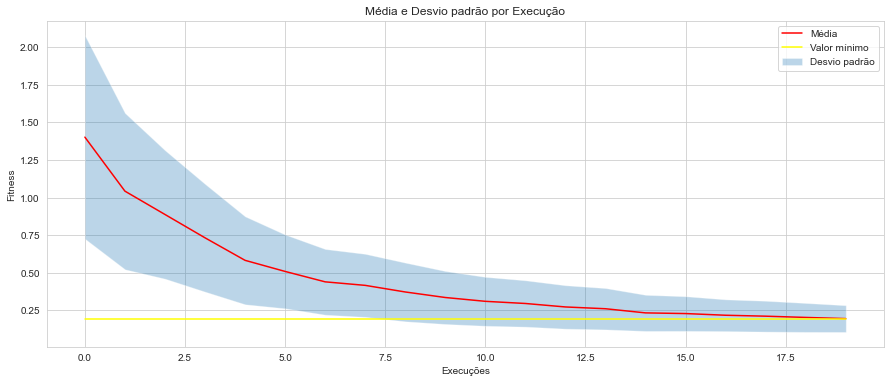

In [1018]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao.index, df_dispersao["mean"], label='Média', color="red")
plt.fill_between(range(len(df_dispersao)), df_dispersao["mean"]-df_dispersao["std"], df_dispersao["mean"]+df_dispersao["std"], alpha=0.3, label='Desvio padrão')
plt.plot(df_dispersao.index, [min(df_dispersao["mean"]) for i in range(len(df_dispersao.index))], label="Valor mínimo", color="yellow")
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Média e Desvio padrão por Execução")
plt.legend()
plt.show()

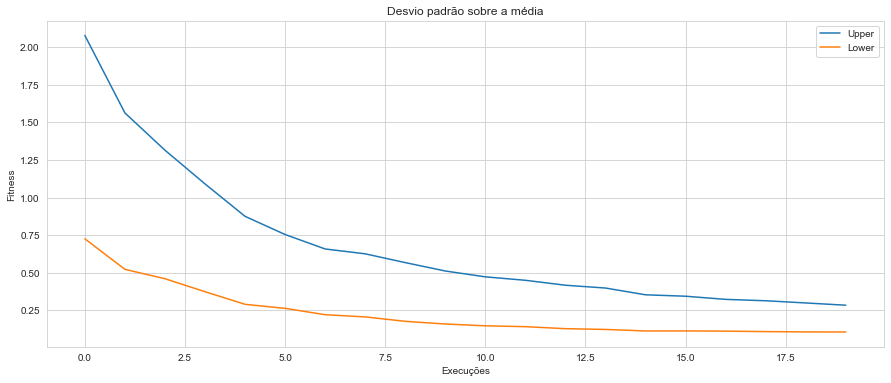

In [1019]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao.index, df_dispersao["mean"] + df_dispersao["std"], label='Upper')
plt.plot(df_dispersao.index, df_dispersao["mean"] - df_dispersao["std"], label='Lower')
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Desvio padrão sobre a média")
plt.legend()
plt.show()

> <p align="justify">Através dos resultados apresentados podemos observar que a população está convergindo à solução ótima (se pensarmos em minimização) neste algoritmo quando vemos que a média continua se aproximando de zero.<br>
Podemos ainda visualizar através do gráficos acima que o desvio padrão (máximo e mínimo) calculado sobre os melhores resultados selecionados um entre todas as populações por execução se aproxima cada vez mais da curva que representa a média sobre os mesmos resultados selecionados, porém ainda apresenta um valor elevado em comparação à média, nos deixando com uma baixa confiabilidade no algoritmo.</p>


# PSO

In [1020]:
import numpy as np
import pandas as pd
import random
import operator
import copy

### Classe Partícula

In [1021]:
class Particula:
    def __init__(self, qtd_valores, qtd_geracoes, lb, ub, w_min, w_max, c1, c2, pBest, gBest, range_values):
        self.qtd_valores = qtd_valores
        self.qtd_geracoes = qtd_geracoes
        self.lb = lb
        self.ub = ub
        self.c1 = c1
        self.c2 = c2
        self.w_min = w_min
        self.w_max = w_max
        self.pBest = pBest
        self.gBest = gBest
        self.range_values = range_values
        self.posicoes = []
        self.velocidades = [0, 0, 0]
        self.fitness = 0
        self.particula = [0, 0, 0, 0]
        self.velocidade_max = (self.range_values[1] - self.range_values[0]) / 2.0

        self.iniciar_posicoes()
        self.atualizar_velocidade_inicial()
        self.atualizar_posicoes()
        self.calcular_fitness()

    def iniciar_posicoes(self):
        for i in range(self.qtd_valores):
            self.posicoes.append(self.lb[i] + (self.ub[i] - self.lb[i]) * random.uniform(0,1))

    def atualizar_velocidade_inicial(self):
        for i in range(self.qtd_valores):
            self.velocidades[i] = self.posicoes[i] * random.uniform(0,1)
        
    def atualizar_velocidades(self, pBest, gBest, t):
        for i in range(self.qtd_valores):
            r1 = random.uniform(0,1)
            r2 = random.uniform(0,1)
            w = self.w_max - (self.w_max - self.w_min) * t / self.qtd_geracoes
            self.velocidades[i] = w*self.velocidades[i] + self.c1*r1*(pBest[i] - \
                self.posicoes[i]) + self.c2*r2*(gBest[i] - self.posicoes[i])

            if abs(self.velocidades[i]) > self.velocidade_max:
                self.velocidades[i] = np.sign(self.velocidades[i]) * self.velocidade_max
            
            if self.posicoes[i] < self.range_values[0]:
                self.posicoes[i] = self.range_values[0]
            if self.posicoes[i] > self.range_values[1]:
                self.posicoes[i] = self.range_values[1]

    def atualizar_posicoes(self):
        for i in range(self.qtd_valores):
            self.posicoes[i] = self.posicoes[i] + self.velocidades[i]
            

    def calcular_fitness(self):
        self.fitness = 10 * (self.posicoes[0] - 1)**2 + 20 * (self.posicoes[1] - 2)**2 + 30 * (self.posicoes[2] - 3)**2

In [1022]:
class Enxame:
    def __init__(self, qtd_seqs, qtd_valores, qtd_geracoes, lb, ub, w_min, w_max, c1, c2, pBest, gBest, range_values):
        self.qtd_seqs = qtd_seqs
        self.qtd_valores = qtd_valores
        self.qtd_geracoes = qtd_geracoes
        self.lb = lb
        self.ub = ub
        self.w_min = w_min
        self.w_max = w_max
        self.c1 = c1
        self.c2 = c2
        self.pBest = pBest
        self.gBest = gBest
        self.range_values = range_values
        self.enxame = []

        self.iniciar_enxame()

    def iniciar_enxame(self):
        for i in range(self.qtd_seqs):
            p = Particula(self.qtd_valores, self.qtd_geracoes, self.lb, self.ub, self.w_min, self.w_max, self.c1, self.c2, self.pBest, self.gBest, self.range_values)
            p.atualizar_velocidade_inicial()
            p.atualizar_posicoes()
            p.calcular_fitness()
            self.enxame.append(p)

    def atualizar_enxame(self, pBest, gBest, t):
        for i in range(self.qtd_seqs):
            self.enxame[i].atualizar_velocidades(pBest[0].posicoes, gBest.posicoes, t)
            self.enxame[i].atualizar_posicoes()
            self.enxame[i].calcular_fitness()

In [1023]:
 class Geracao:
    def __init__(self, qtd_seqs, qtd_valores, qtd_geracoes, lb, ub, w_min, w_max, c1, c2, range_values):
        self.qtd_seqs = qtd_seqs
        self.qtd_valores = qtd_valores
        self.qtd_geracoes = qtd_geracoes
        self.lb = lb
        self.ub = ub
        self.w_min = w_min
        self.w_max = w_max
        self.c1 = c1
        self.c2 = c2
        self.range_values = range_values
        self.gBest = self
        self.pBest = []
        self.fitness = []
        self.df_dispersao_g = pd.DataFrame(columns=["mean", "std"])
        self.df_solucoes_g = pd.DataFrame(columns=["x1", "x2", "x3", "Fitness"])
        
        self.e = Enxame(self.qtd_seqs, self.qtd_valores, self.qtd_geracoes,self.lb, self.ub, self.w_min, self.w_max, self.c1, self.c2, self.pBest, self.gBest, self.range_values)
        
        self.executar_geracoes()
        
    def executar_geracoes(self):
        self.gBest = copy.deepcopy(min(self.e.enxame, key=operator.attrgetter('fitness')))

        self.pBest = copy.deepcopy(self.e.enxame)

        for t in range(self.qtd_geracoes):
            self.e.atualizar_enxame(self.pBest, self.gBest, t)

            melhor_do_enxame = copy.deepcopy(self.e.enxame[0].fitness)
            for i in range(self.qtd_seqs):
                if (self.e.enxame[i].fitness < self.pBest[i].fitness):
                    self.pBest[i].posicoes = copy.deepcopy(self.e.enxame[i].posicoes)
                    self.pBest[i].fitness = copy.deepcopy(self.e.enxame[i].fitness)
                
                if (self.e.enxame[i].fitness < self.gBest.fitness):
                    self.gBest.posicoes = copy.deepcopy(self.e.enxame[i].posicoes)
                    self.gBest.fitness = copy.deepcopy(self.e.enxame[i].fitness)
            
                self.fitness.append(self.e.enxame[i].fitness)


            melhor = (min(self.e.enxame, key=operator.attrgetter('fitness')))
            df = pd.DataFrame([melhor.posicoes], columns=["x1", "x2", "x3"])
            df["Fitness"] = melhor.fitness
            self.df_solucoes_g = pd.concat([self.df_solucoes_g , df], ignore_index=True)

            means = np.mean(self.fitness)
            df = pd.DataFrame([means], columns=["mean"])
            stds = np.std(self.fitness)
            df["std"] = stds
            self.df_dispersao_g = pd.concat([self.df_dispersao_g, df], ignore_index=True)

### Execução

In [1024]:
qtd_execucoes = 1
w_max = 0.9
w_min = 0.4
c1 = c2 = 2
range_values = (-6, 6)
df_solucoes_g = pd.DataFrame(columns=["x1", "x2", "x3", "Fitness"])
df_dispersao_g = pd.DataFrame(columns=["mean", "std"])

for i in range(qtd_execucoes):
    
    g = Geracao(qtd_seqs, qtd_valores, qtd_geracoes, lb, ub, w_min, w_max, c1, c2, range_values)

    df_solucoes_g = g.df_solucoes_g

    df_dispersao_g = g.df_dispersao_g


### Visualização

**Melhores resultados por geração**

In [1025]:
df_solucoes_g

,x1,x2,x3,Fitness
0,2.311627,2.166562,2.878948,18.198110
1,1.556257,2.253558,2.049476,31.484919
2,0.646969,1.143988,2.138437,38.170185
3,2.045294,1.500096,3.678308,29.727518
4,1.122825,1.196160,2.978115,13.088404
...,...,...,...,...
995,1.000000,2.000000,3.000000,0.000000
996,1.000000,2.000000,3.000000,0.000000
997,1.000000,2.000000,3.000000,0.000000
998,1.000000,2.000000,3.000000,0.000000


**Melhores resultados por execução**

**Média e desvio padrão dos fitness por execução**

In [1026]:
df_dispersao_g

,mean,std
0,924.898451,687.888643
1,719.290935,579.479015
2,654.267259,520.999512
3,614.627648,503.224613
4,624.158166,492.538816
...,...,...
995,52.537046,146.214684
996,52.484351,146.150801
997,52.431761,146.086998
998,52.379277,146.023277


In [1027]:
import matplotlib.pyplot as plt
import seaborn as sbn

No handles with labels found to put in legend.


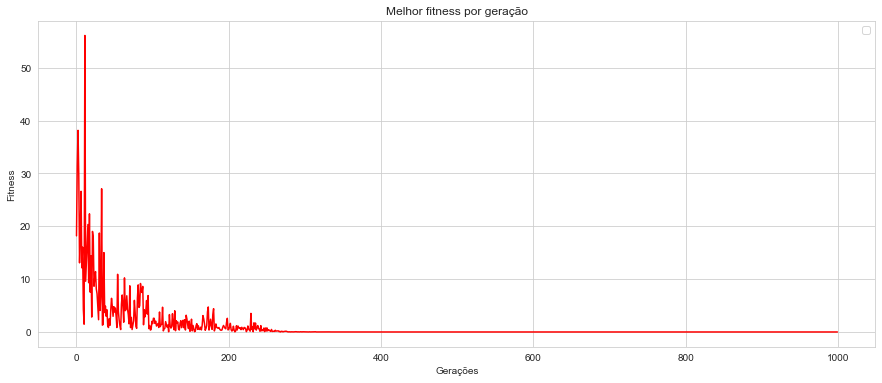

In [1035]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_solucoes_g.index, df_solucoes_g["Fitness"], label='', color="red")
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.title("Melhor fitness por geração")
plt.legend()
plt.show()

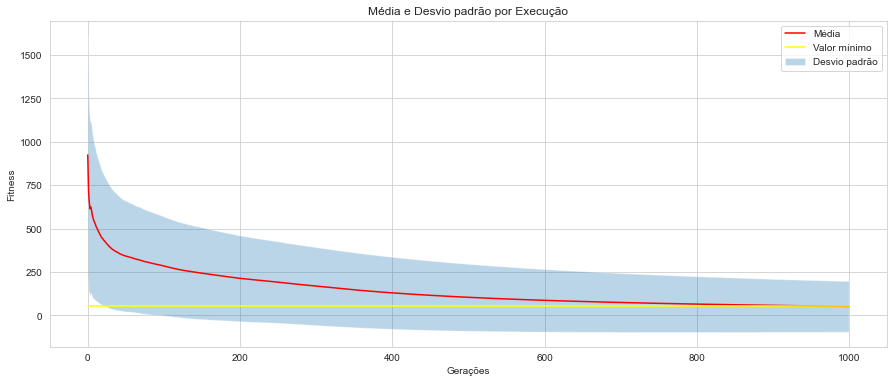

In [1029]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao_g.index, df_dispersao_g["mean"], label='Média', color="red")
plt.fill_between(range(len(df_dispersao_g)), df_dispersao_g["mean"]-df_dispersao_g["std"], df_dispersao_g["mean"]+df_dispersao_g["std"], alpha=0.3, label='Desvio padrão')
plt.plot(df_dispersao_g.index, [min(df_dispersao_g["mean"]) for i in range(len(df_dispersao_g.index))], label="Valor mínimo", color="yellow")
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.title("Média e Desvio padrão por Execução")
plt.legend()
plt.show()

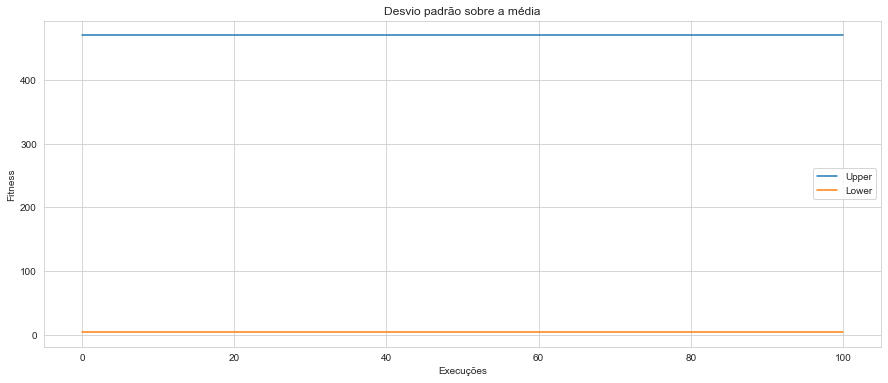

In [1030]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao_e.index, df_dispersao_e["mean"] + df_dispersao_e["std"], label='Upper')
plt.plot(df_dispersao_e.index, df_dispersao_e["mean"] - df_dispersao_e["std"], label='Lower')
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Desvio padrão sobre a média")
plt.legend()
plt.show()

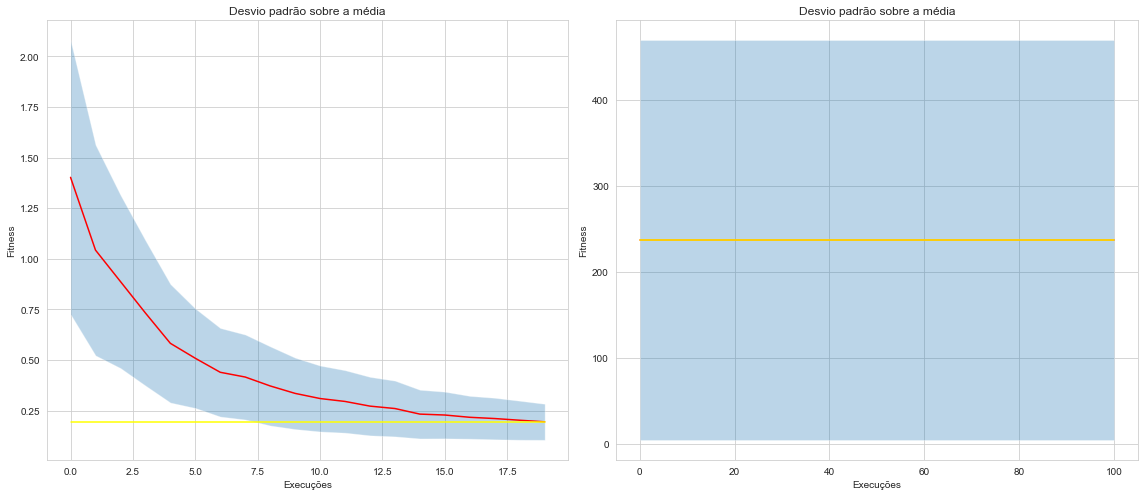

In [1031]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
axes[0].plot(df_dispersao.index, df_dispersao["mean"], label='Média', color="red")
axes[0].fill_between(range(len(df_dispersao)), df_dispersao["mean"]-df_dispersao["std"], df_dispersao["mean"]+df_dispersao["std"], alpha=0.3, label='Desvio padrão')
axes[0].plot(df_dispersao.index, [min(df_dispersao["mean"]) for i in range(len(df_dispersao.index))], label="Valor mínimo", color="yellow")
axes[0].set_xlabel('Execuções')
axes[0].set_ylabel('Fitness')
axes[0].set_title("Desvio padrão sobre a média")
axes[1].plot(df_dispersao_e.index, df_dispersao_e["mean"], label='Média', color="red")
axes[1].fill_between(range(len(df_dispersao_e)), df_dispersao_e["mean"]-df_dispersao_e["std"], df_dispersao_e["mean"]+df_dispersao_e["std"], alpha=0.3, label='Desvio padrão')
axes[1].plot(df_dispersao_e.index, [min(df_dispersao_e["mean"]) for i in range(len(df_dispersao_e.index))], label="Valor mínimo", color="yellow")
axes[1].set_xlabel('Execuções')
axes[1].set_ylabel('Fitness')
axes[1].set_title("Desvio padrão sobre a média")
fig.tight_layout()

> <p align="justify">Através dos resultados apresentados podemos observar que a população está convergindo à solução ótima (se pensarmos em minimização) neste algoritmo quando vemos que a média continua se aproximando de zero.<br>
Podemos ainda visualizar através do gráficos acima que o desvio padrão (máximo e mínimo) calculado sobre os melhores resultados selecionados um entre todas as populações por execução se aproxima cada vez mais da curva que representa a média sobre os mesmos resultados selecionados, porém ainda apresenta um valor elevado em comparação à média, nos deixando com uma baixa confiabilidade no algoritmo.</p>
